In [2]:
from random import randint, uniform

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vamso gerar uma base de dados de 2 mil linhas, com duas colunas idades e salários.
Idade vai variar entre 18 e 95.
Sarios vai variar entre 1300 e 100000

In [3]:
idades = [randint(18, 95) for _ in range(2000)]
salarios = [uniform(1300, 100000) for _ in range(2000)]

df = pd.DataFrame(zip(idades, salarios), columns=["idade", "salario"])

df.head()

,idade,salario
0,33,44338.086059
1,84,80423.613015
2,29,3191.497773
3,37,85832.505257
4,36,68620.534553


<Axes: xlabel='idade', ylabel='salario'>

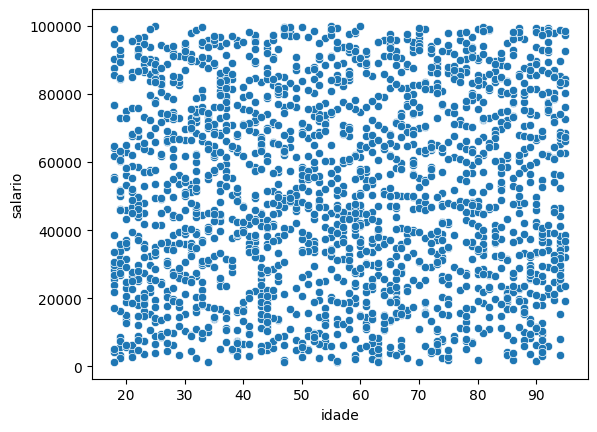

In [4]:
sns.scatterplot(x="idade", y="salario", data=df)

Text(0.5, 1.0, 'Número de pessoas por salário')

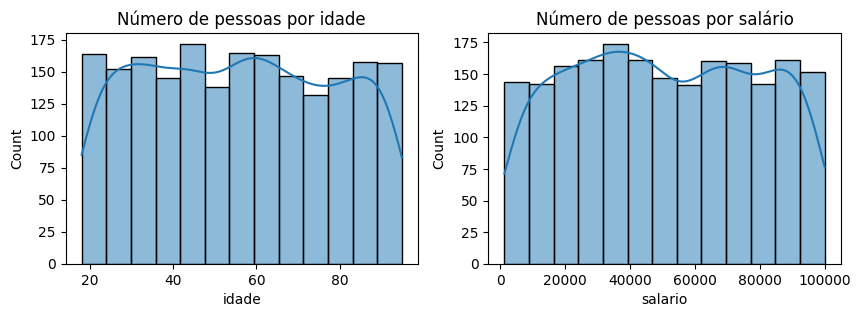

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

sns.histplot(data=df["idade"], kde=True, ax=axes[0])
axes[0].set_title('Número de pessoas por idade')

sns.histplot(data=df["salario"], kde=True, ax=axes[1])
axes[1].set_title('Número de pessoas por salário')

* Vídeo didático explicando o funcionando do kmeans:

https://youtu.be/OWyWevKhM0c?si=WqtawW-cgtNtXRQo

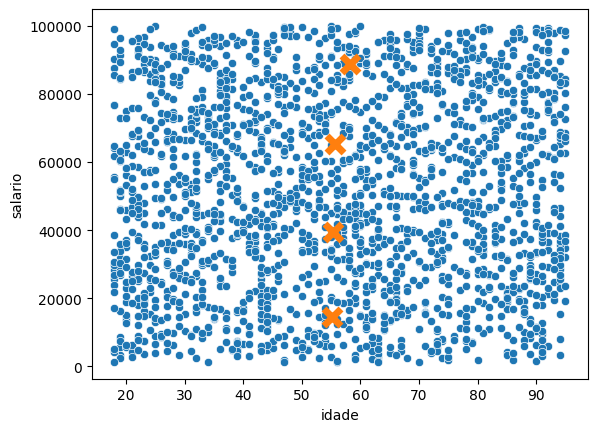

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(df[["idade", "salario"]])

centroides = kmeans.cluster_centers_

sns.scatterplot(x="idade", y="salario", data=df)
plt.scatter(centroides[:,0], centroides[:,1], marker = "x", s=150, linewidths = 5)# , zorder = 10, c=['green', 'red','blue']

In [7]:
df["cluster"] = kmeans.predict(df[["idade", "salario"]])
df.head()

,idade,salario,cluster
0,33,44338.086059,3
1,84,80423.613015,2
2,29,3191.497773,1
3,37,85832.505257,2
4,36,68620.534553,0


In [8]:
df.groupby("cluster").mean()

,idade,salario
cluster,,
0,55.664622,65327.279499
1,55.173653,14456.926070
2,58.313596,88850.524744
3,55.254513,39531.700241


## Feature Scaling

### Normalização
* Usa como "escalonador" o valor mínimo e o valor máximo
* Varia entre 0 e 1
* "Achata" os dados, ou seja, outliers perdem seu poder de influência
* São indicados para os casos onde se tem distribuições normais nos dados;

### Padronização
* Usa como "escalonador" o valor da média e o desvio padrão
* Pode ter valores negativos
* Consegue representar mais a variabilidade dos dados
* São indicados para os casos onde não se tem distribuições normais nos dados;



## Como saber se os dados seguem uma distribuição normal?

1) Gráficos

2) Teste de normalidade

* **Hipotese nula**: Os dados seguem distribuição normal
* **Hipotese alternativa**: Os dados não seguem distribuição normal


**k2 (chi-squared statistic)**:

Este valor é, na verdade, a soma de dois termos elevados ao quadrado: s² + k². Sendo s o valor z obtido através do teste de assimetria (skewtest) e k é o valor da estatística z obtido pelo teste de curtose.

**p (p-value)**:

É a probabilidade de se obter um efeito tão extremo quanto o que está ocorrendo em nossos dados, assumindo que a hipótese nula é verdadeira. (Qual a probabilidade da distribuição que observamos naquele histograma ocorrer? Este é o p-valor)

**alpha**:


Qual o nível de erro que aceitamos em nosso teste? Rejeitamos a hipótese nula quando o valor-p for menor do que o nível de significância do nosso teste

In [9]:
from scipy.stats import normaltest

k2, p = normaltest(df['salario'])

alpha = 0.05 # 5% Se a probabilidade for menor que 5% então vamos rejeitar a hipótese nula

print(k2, p)

# Se o p-valor for menor que o nível de significância, temos evidências de que essa hipótese nula pode ser rejeitada
if p < alpha:
    print("A Hipótese nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

1475.9921154135961 0.0
A Hipótese nula pode ser rejeitada


In [10]:
from scipy.stats import normaltest

k2, p = normaltest(df['idade'])

alpha = 0.05

print(k2, p)

# Se o p-valor for menor que o nível de significância, temos evidências de que essa hipótese nula pode ser rejeitada
if p < alpha:
    print("A Hipótese nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

1513.2229967652645 0.0
A Hipótese nula pode ser rejeitada


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

dados_input = df[["idade", "salario"]]
scaler.fit(dados_input)

dados_input_scaled = scaler.transform(dados_input)

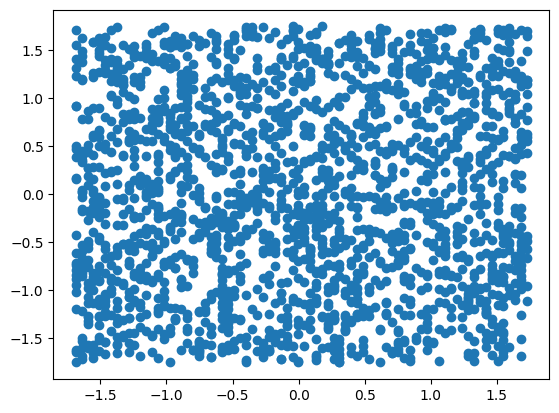

In [14]:
plt.scatter(x=dados_input_scaled[:,0], y=dados_input_scaled[:,1])

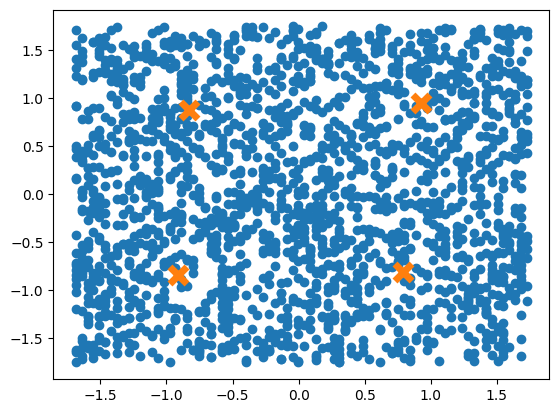

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(dados_input_scaled)

centroides = kmeans.cluster_centers_

plt.scatter(x=dados_input_scaled[:,0], y=dados_input_scaled[:,1])
plt.scatter(centroides[:,0], centroides[:,1], marker = "x", s=150, linewidths = 5)# , zorder = 10, c=['green', 'red','blue']

In [16]:
df["cluster"] = kmeans.predict(dados_input_scaled)
df.groupby("cluster").mean()

,idade,salario
cluster,,
0,37.386037,75570.468212
1,73.908088,27948.268966
2,76.918455,77390.446276
3,35.401590,26906.036882


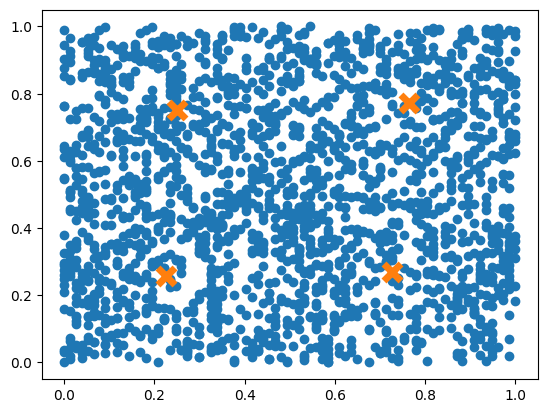

In [17]:
scaler = MinMaxScaler()

dados_input = df[["idade", "salario"]]
scaler.fit(dados_input)

dados_input_scaled = scaler.transform(dados_input)

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(dados_input_scaled)

centroides = kmeans.cluster_centers_

plt.scatter(x=dados_input_scaled[:,0], y=dados_input_scaled[:,1])
plt.scatter(centroides[:,0], centroides[:,1], marker = "x", s=150, linewidths = 5)# , zorder = 10, c=['green', 'red','blue']

In [18]:
df["cluster"] = kmeans.predict(dados_input_scaled)

df.head()

,idade,salario,cluster
0,33,44338.086059,3
1,84,80423.613015,2
2,29,3191.497773,3
3,37,85832.505257,0
4,36,68620.534553,0


In [19]:
df.groupby("cluster").mean()

,idade,salario
cluster,,
0,37.409836,75518.804326
1,73.908088,27948.268966
2,76.918455,77390.446276
3,35.374502,26859.318844


# Pontos importantes

* Feature scaling é importante para algoritmos que utilizam distância e redes neurais;
* A avaliação do resultado de uma clusterização é feita analisando a distribuição dos dados nos grupos

## Comprovando os resultados do teste de normalidade

(array([  2.,  14.,  61., 211., 433., 513., 444., 233.,  80.,   9.]),
 array([-3.83712423, -3.14823086, -2.4593375 , -1.77044413, -1.08155077,
        -0.3926574 ,  0.29623596,  0.98512933,  1.67402269,  2.36291606,
         3.05180942]),
 <BarContainer object of 10 artists>)

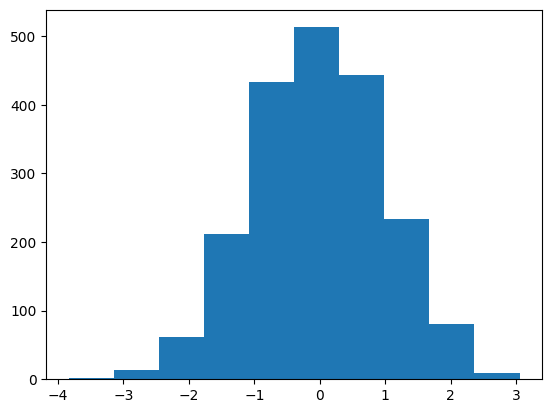

In [11]:
from random import gauss

sigma = 1
media = 0

valores_normais = [gauss(media, sigma) for i in range(0, 2000)]
plt.hist(valores_normais)

In [12]:
from scipy.stats import normaltest

k2, p = normaltest(valores_normais)

alpha = 0.05

print(k2, p)

# Se o p-valor for menor que o nível de significância, temos evidências de que essa hipótese nula pode ser rejeitada
if p < alpha:
    print("A Hipótese nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

2.1997892772540983 0.33290615730014256
A hipótese nula não pode ser rejeitada
